In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.signal
import IPython
from scipy.signal import butter, lfilter, freqz

# Audio Filters and Equalizers

## 1. Introduction
Digital audio processing encompasses a broad range of techniques for manipulating sound, and at the heart of these techniques are audio filters and equalizers. This project delves into the mathematical concepts and practical implementations of these essential tools using Python.

### What is an audio signal?
**An audio signal** refers to an electrical representation of sound waves that can be captured, transmitted, stored, or processed by electronic devices. It carries the essential information of the sound, including its frequency, amplitude, and phase, allowing us to perceive and reproduce auditory experiences. In simple terms, when we speak, play music, or any other sound is produced, it creates vibrations in the air. These vibrations travel as sound waves and eventually reach our ears. An audio signal converts these sound waves into an electrical signal that can be used by various technological devices, such as speakers.

This 👇 code snippet generates a 100 Hz sine wave sampled at 44,100 Hz for a duration of 1 second and plots the resulting signal.

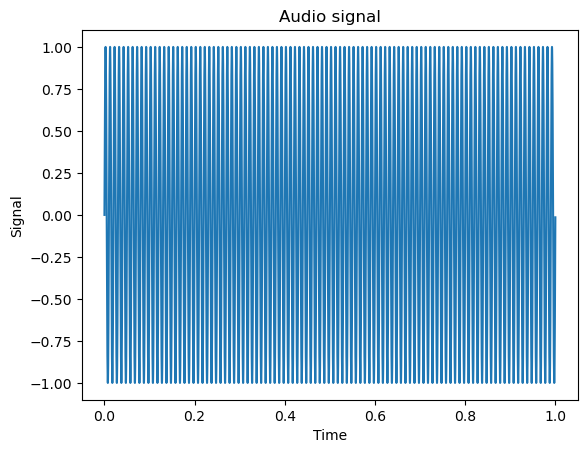

In [3]:
sampling_rate = 44100
frequency = 100
length = 1.0

t = np.arange(0, length, 1.0/sampling_rate) # Generate time array
signal = np.sin(np.pi * 2 * frequency * t) # Generate sine wave signal

plt.plot(t, signal)
plt.title("Audio signal")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.show()

Saving the resulting signal as a WAV file. 

In [4]:
signal *= 32767 # Scale the signal to 16-bit integer range
signal = np.int16(signal) # Convert to 16-bit integer
wavfile.write("audio_signal.wav", sampling_rate, signal)

### What is sample width, sample rate(frequency)?
#### Sample rate
**Sample rate** is the number of samples per second that are taken of a waveform to create a discete digital signal. The higher the sample rate, the more snapshots you capture of the audio signal.

<img src="images/sample_rate.jpg" alt="Sample Rate image" style="width:400px;height:200px;">

#### Sample width (bit depth)
**The audio bit depth** determines the number of possible amplitude values we can record for each audio sample. The higher the bit depth, the more amplitude values per sample are captured to recreate the original audio signal.

<img src="images/bit_depth.png" alt="Sample Rate image" style="width:400px;height:200px;">

### What is time domain?
In signal processing, the **time domain** refers to the analysis of mathematical functions or physical signals with respect to time. It is one of the fundamental domains used to describe and analyze signals. It's often used for real-time signal monitoring and initial examination before applying more complex transformations. Also, time domain analysis is fundamental in various applications, including audio and speech processing, telecommunications, and control systems.

#### Representation
* In the time domain, a signal is represented as a function of time. For instance, if **$x(t)$** represents a signal, it shows how the signal varies over time **$t$**.
* The horizontal axis typically represents time, while the vertical axis represents the signal's amplitude or intensity.

#### Continuous-Time and Discrete-Time Signals

##### 1. Continuous-Time Signals
* **Continuous-Time Signals** are defined for every moment in time.
For example, an analog signal like a sine wave can be described by the formula:
$$x(t) = A \sin(2 \pi f t + \phi)$$
Where:
* $A$ is amplitude, 
* $f$ is frequency
* $ϕ$ is phase.

##### 2. Discrete-Time Signals
* **Discrete-Time Signals** are defined only at specific time intervals, usually resulting from sampling a continuous-time signal. An example is $x[n]$, where $n$ represents discrete time instances.

### What is frequency domain?
**Frequency domain** analysis is a crucial aspect of signal processing where signals are examined in terms of their frequency components rather than time. This transformation from the time domain to the frequency domain is often achieved using mathematical tools like the Fourier Transform.

## 2. How does the Fourier transform work?
### Definition
First of all, let me explain what the Fourier transform is and what it would be useful for.

**Fourier Transform** is a mathematical model which helps to transform the signals between two different domains, such as transforming signal from frequency domain to time domain or vice versa. It's a tool that breaks a waveform (a function or signal) into an alternate representation, characterized by the sine and cosine functions of varying frequencies. The Fourier's theorem states that every signal can be expressed by a combination of a proper set of sine waves.

### Forward Fourier Transform equation
The equation for the Forward Fourier Transform is:

$$ S_x(f) = \int_{-\infty}^{+\infty} x(t) e^{-i 2 \pi f t} \, dt $$ 

Where:

* $S_x(f)$ is the output of the Fourier Transform in the frequency domain
* $x(t)$ is the input time domain function
* $2πf$ is the frequency in radians per second
* $j$ is the imaginary unit.

Complex numbers in the Fourier Transform indicate how much of the energy for a given frequency is in the sine or cosine component. This is known as the phase.


### Inverse Fourier transformation
Аccordingly, there is a reverse process - **Inverse Fourier transformation**. It is a mathematical formula that converts a signal in the frequency domain $ω$ to one in the time (or spatial) domain $t$.

$$ f(x) = \int_{-\infty}^{\infty} F(k) e^{i 2 \pi k x} \, dk $$

Where:

* $f(x)$ is the original time-domain function
* $F(k)$ is the Fourier transform of $𝑓(𝑥)$, which represents the function in the frequency domain.
* $e^{i 2 \pi k x}$ is the complex exponential function, where $i$ is the imaginary unit, $k$ is the frequency variable, and $x$ is the time (or spatial) variable.
* The integral runs from $−∞$ to $∞$, indicating that all frequencies are considered in reconstructing the time-domain function.

### DFT and FFT
Two types of Fourier Transforms are commonly used today in computer based applications: 
* The Discrete Fourier Transform (DFT) and the Fast Fourier Transform (FFT):

Fourier analysis is a family of mathematical techniques, all based on decomposing signals into
sinusoids. 
**Discrete Fourier Transform (DFT)** performs a Fourier Transform on a discrete time block. A DFT can be performed on any time signal composed of an arbitrary number of data points. It is defiined as:

$$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i \frac{2 \pi}{N} k n}, \quad k = 0, 1, \ldots, N-1$$

The inverse Discrete Fourier Transform (IDFT) is defined as:

$$x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k \cdot e^{i \frac{2 \pi}{N} k n}, \quad n = 0, 1, \ldots, N-1$$

The **Fast Fourier Transform (FFT)** is an algorithm to compute the Discrete Fourier Transform (DFT) and its inverse efficiently. The FFT reduces the complexity of computing the DFT from $O(N^2)$ to $O(N \log N)$, making it very useful for large datasets.

### Euler's formula
In complex analysis, **Euler's formula** provides a fundamental bridge between the exponential function and the trigonometric functions. For complex numbers x, Euler's formula says that:

$$e^{ix} = \cos x + i \sin x$$

### Properties of Fourier Transform
#### 1. Linearity:
The Fourier transform is linear, meaning it satisfies the superposition principle. It allows for easy decomposition of signals and functions into simpler components and simplifies the analysis and manipulation of signals in various applications such as filtering and modulation.

$$F\{af(t)+bg(t)\}=aF\{f(t)\}+bF\{g(t)\}$$

Where: 
* $F\{f(t)\}$ represents the Fourier transform of the function $f(t)$.
* $F\{g(t)\}$ represents the Fourier transform of the function $g(t)$.
* $a$ and $b$ are constants.

#### 2. Time Shifting:
Shifting a function in time domain results in a phase shift in frequency domain. It is useful for analyzing how signals change with respect to time shifts.

$$F\{f(t-t_0)\}=e^{-i\omega t_0}F(\omega)$$

Where:
* $F\{f(t)\}$ denotes the Fourier transform of $f(t)$, which is $F(\omega)$ in the frequency domain.
* $ω$ is the angular frequency variable.
* $e^{-i\omega t_0}$ is a phase factor that depends on the shift $t_0$.

#### 3. Frequency Shifting:
Multiplying a function by a complex exponential in time domain results in a frequency shift in frequency domain. It allows for the analysis of modulated signals and understanding how changing the carrier frequency affects the spectrum of a signal.

$$F(e^{i\omega_{0} t} f(t)) = F(\omega - \omega_{0})$$

Where:
* $F\{f(t)\} =  F(\omega)$ denotes the Fourier transform of $f(t)$, which is $F(\omega)$
* $\omega$ and $\omega_0$ are angular frequencies in the frequency domain

#### 4. Convolution:
The convolution of two functions in time domain corresponds to the multiplication of their Fourier transforms in frequency domain.
The convolution enables efficient computation of linear time-invariant systems and filters.

$$F\left\{ f(t) \ast g(t) \right\} = F(\omega)G(\omega)$$

Where $f(t) \ast g(t)$ denotes the convolution of two functions $f(t)$ and $g(t)$

#### 5. Parseval's Theorem:
Relates the energy of a signal in time domain to the energy of its Fourier transform in frequency domain. Provides a means to calculate and compare the total power or energy content of a signal in both time and frequency domains.

$$ \int_{-\infty}^{\infty} |f(t)|^2 dt = \int_{-\infty}^{\infty} |F(\omega)|^2 d\omega $$

Where:
* $|f(t)|^2$ denotes the squared magnitude of $f(t)$, representing the energy density in the time domain.
* $|F(\omega)|^2$ denotes the squared magnitude of $F(\omega)$, representing the energy density in the frequency domain.

### Fourier Transform Demonstration

Тhe code below generates a composite signal consisting of two sine waves with frequencies of 70 Hz and 100 Hz, sampled at 1000 Hz. It then computes the Fourier Transform of the signal and visualizes both the original signal and its frequency spectrum.

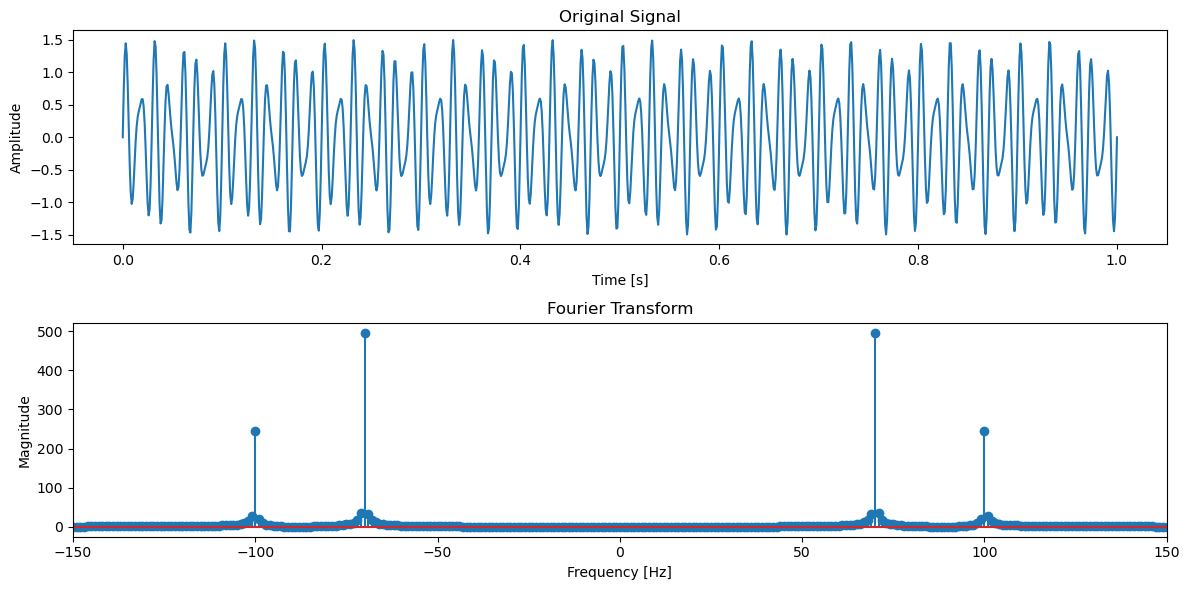

In [5]:
sampling_rate = 1000
T = 1.0 / sampling_rate
t = np.linspace(0.0, 1.0, int(1.0 / T)) # Time interval between samples

freq1 = 70.0
freq2 = 100.0
signal = np.sin(2 * np.pi * freq1 * t) + 0.5 * np.sin(2 * np.pi * freq2 * t) # Composite signal

# Compute the Fourier Transform
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), T)


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.stem(fft_freq, np.abs(fft_result))
plt.title('Fourier Transform')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(-150, 150)

plt.tight_layout()
plt.show()

### Plots of some common functions (sine, step, pulse, sinc, gaussian) and their Fourier spectrums

In [6]:
sampling_rate = 1000
T = 1.0 / sampling_rate # Time interval between samples

t = np.linspace(-5, 5, 1000)

This code snippet generates a sine wave signal sampled at 1000 Hz, computes its Fourier Transform, and visualizes both the original signal and its frequency spectrum. 

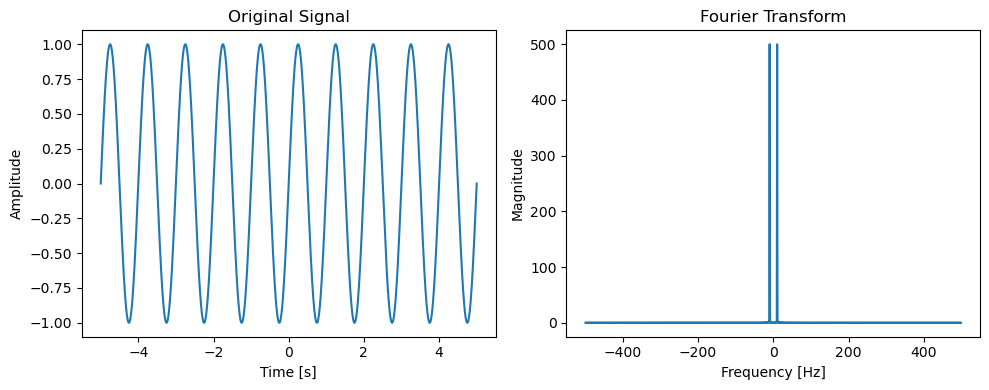

In [7]:
def sine_wave(t):
    '''
    This function generates sine wave signal.

    Parameters:
    - t (np.ndarray): The array of time points at which the signal is sampled 
    '''
    return np.sin(2 * np.pi * t)

sine_signal = sine_wave(t)

# Compute the Fourier Transform
fft_result = np.fft.fft(sine_signal)
fft_freq = np.fft.fftfreq(len(sine_signal), T) # връща масив от честотни бинове

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, sine_signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Fourier Transform')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

The code below generates a step function signal sampled at 1000 Hz, computes its Fourier Transform, and visualizes both the original signal and its frequency spectrum.

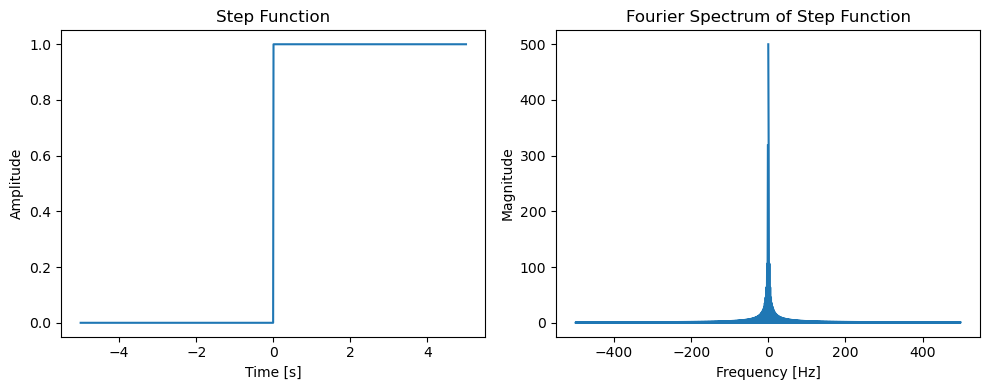

In [8]:
def step_function(t):
    '''
    This function generates step function signal.

    Parameters:
    - t (np.ndarray): The array of time points at which the signal is sampled 
    '''
    return np.heaviside(t, 1)

step_signal = step_function(t)

# Compute the Fourier Transform
fft_result = np.fft.fft(step_signal)
fft_freq = np.fft.fftfreq(len(step_signal), T) #връща масив от честотни бинове

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, step_signal)
plt.title('Step Function')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Fourier Spectrum of Step Function')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

The code snippet below generates a sinc function signal sampled at 1000 Hz, computes its Fourier Transform, and visualizes both the original signal and its frequency spectrum. 

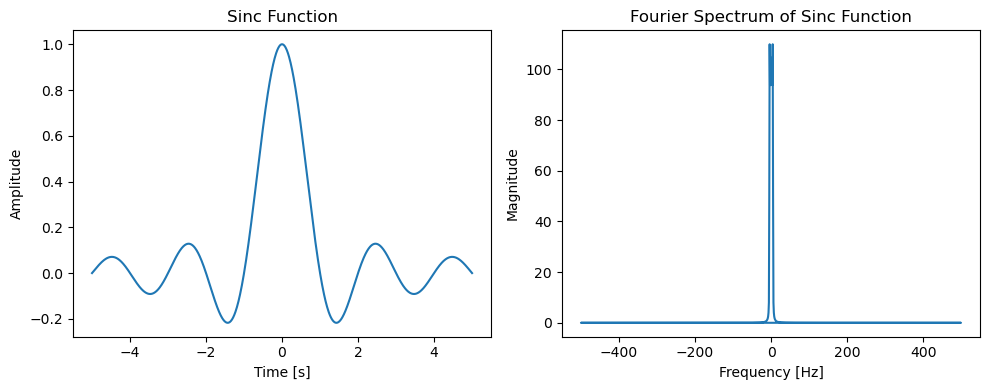

In [9]:
def sinc_function(t):
    '''
    This function generates sinc function signal.

    Parameters:
    - t (np.ndarray): The array of time points at which the signal is sampled 
    '''
    return np.sinc(t)

sinc_signal = sinc_function(t)

# Compute the Fourier Transform
fft_result = np.fft.fft(sinc_signal)
fft_freq = np.fft.fftfreq(len(sinc_signal), T)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, sinc_signal)
plt.title('Sinc Function')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Fourier Spectrum of Sinc Function')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

## 3. What is a spectrogram and how to interpret it?
A spectrogram, often referred to as a sonogram, voiceprint, or voicegram, is a visual representation of the spectrum of frequencies in a signal as they evolve over time. In essence, it provides a three-dimensional view of a sound signal, with the three dimensions being time, frequency, and amplitude.

1. Time: Represented on the horizontal x-axis, it shows the progression of the signal from its start to its end.
<br>
2. Frequency: Captured on the vertical y-axis, it illustrates the range of frequencies contained within the signal, from the lowest to the highest.
<br>
3. Amplitude: Depicted through the color or intensity of the plot, it indicates the strength or loudness of a frequency at a specific point in time.

We can read audio.

In [10]:
samplerate, data = wavfile.read("Harvard_List_01_1.wav")

C:\Users\Цецо\AppData\Local\Temp\ipykernel_4276\4123923541.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read("Harvard_List_01_1.wav")


And let's hear it.

In [11]:
# IPython.display.Audio("Harvard_List_01_1.wav")

Now I want to see its spectrogram

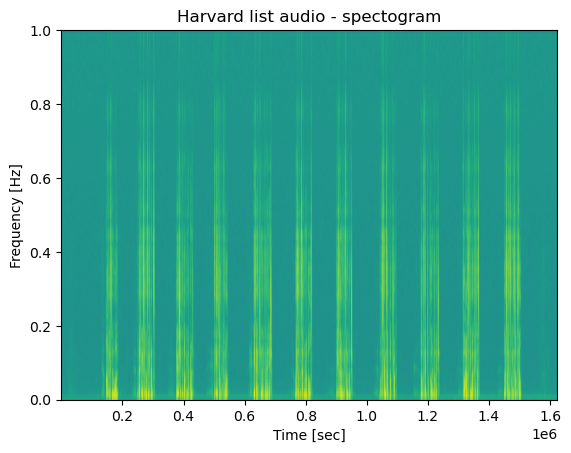

In [12]:
plt.specgram(data)
plt.title("Harvard list audio - spectogram")
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

## 4. Audio Filters
### 1. Definition
An audio filter is a tool, either hardware or software, designed to alter the frequency content of an audio signal. Essentially, filters work by removing certain frequencies while allowing others to pass through. With audio filters, we have the capability to target individual frequencies or entire groups of frequencies, referred to as bands..

### 2. Types
There are various kinds of audio filters, such as low-pass filters, high-pass filters, band-pass filters, and notch filters, among others. Each filter type has distinct properties and serves different functions in audio processing.

#### What is a low-pass filter?
A low-pass filter is a type of audio filter that allows low frequency signals to pass through, but blocks or attenuates high frequency signals. In other words, a low-pass filter “passes” low frequencies and “cuts” or filters out high frequencies. (8)

This code snippet demonstrates how to apply a low-pass Butterworth filter to audio data read from a WAV file.

In [13]:
def lowpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
    '''
    This function designs the filter using the 
    specified cutoff frequency and sample rate and 
    applies it to the input signal to remove 
    high-frequency components.

    Parameters:
    - data (np.ndarray): The input signal to be filtered
    - cutoff (float): The cutoff frequency of the low-pass filter in Hz
    - sample_rate (float): The sample rate of the input signal in Hz
    - poles (int): The number of poles in the filter (default is 5)

    Returns:
    - filtered_data (np.ndarray): The filtered signal
    '''
    
    sos = scipy.signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
    #output='sos': По този начин се връща представяне на филтъра чрез звена на втори ред (SOS), 
    #което е удобно за последващо филтриране.
    
    filtered_data = scipy.signal.sosfiltfilt(sos, data)

    #scipy.signal.sosfiltfilt: Тази функция извършва филтриране на входните данни (data) със 
    #зададените кофициенти на филтъра (sos). sosfiltfilt използва forward-backward метода за филтриране, 
    #който осигурява линейна фазова характеристика на филтъра и по-добра реекция върху транзиентни сигнали.
    
    return filtered_data


#data (тип np.ndarray): Входният сигнал, който трябва да бъде филтриран. Това е масив от числа (например времеви ред или аудио сигнал).
#cutoff (тип float): Честотата на отсечка на филтъра. Всички честоти по-големи от тази ще бъдат подавани през филтъра.
#sample_rate (тип float): Честотата на семплиране на входния сигнал (data). Това е броят на измерванията в секунда.
#poles (тип int, по подразбиране 5): Брой на полюсите на филтъра, които контролират формата и характеристиките на филтъра.

# Loading sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read('Harvard_List_01_1.wav')
times = np.arange(len(data))/sample_rate

# Apply a 50 Hz low-pass filter to the original data
filtered = lowpass(data, 50, sample_rate)

C:\Users\Цецо\AppData\Local\Temp\ipykernel_4276\3311642322.py:37: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = scipy.io.wavfile.read('Harvard_List_01_1.wav')


Now, i am going to plot the results (The original and the filtered signal)

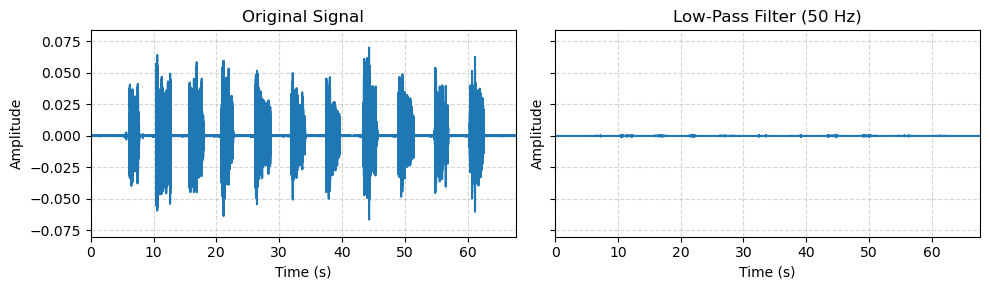

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.plot(times, data)
ax1.set_title("Original Signal")
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax2.plot(times, filtered)
ax2.set_title("Low-Pass Filter (50 Hz)")
ax2.grid(alpha=.5, ls='--')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

And what about spectograms for the original and the filtered signal? 

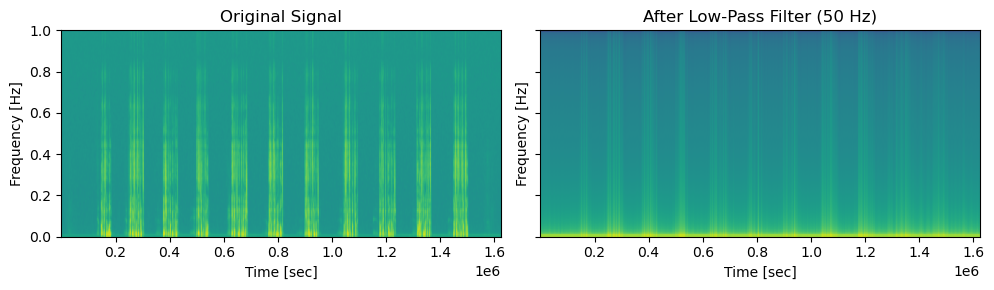

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.specgram(data)
ax1.set_title("Original Signal")
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Frequency [Hz]')
ax2.specgram(filtered)
ax2.set_title("After Low-Pass Filter (50 Hz)")
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

#### What is a high-pass filter?
A high-pass filter is a type of audio filter that allows high frequency signals to pass through, but blocks or attenuates low frequency signals. Since high-pass filters are useful to cut low frequencies, a high-pass is sometimes called a “low cut,” the same way a low-pass is occasionally called a “high cut.”

This code snippet demonstrates how to apply a high-pass Butterworth filter to audio data read from a WAV file.

In [16]:
def highpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
    '''
    The highpass function designs the filter using the 
    specified cutoff frequency and sample rate and applies 
    it to the input signal to remove low-frequency components.
    
    Parameters:
    - data (np.ndarray): The input signal to be filtered
    - cutoff (float): The cutoff frequency of the high-pass filter in Hz
    - sample_rate (float): The sample rate of the input signal in Hz
    - poles (int): The number of poles in the filter (default is 5)

    Returns:
    - filtered_data (np.ndarray): The filtered signal
    '''
    
    sos = scipy.signal.butter(poles, cutoff, 'highpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

# Load sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read('Harvard_List_01_1.wav')
times = np.arange(len(data))/sample_rate

# Apply a 20 Hz high-pass filter to the original data
filtered_h = highpass(data, 20, sample_rate)

C:\Users\Цецо\AppData\Local\Temp\ipykernel_4276\1304920782.py:22: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = scipy.io.wavfile.read('Harvard_List_01_1.wav')


And again some plots of the results

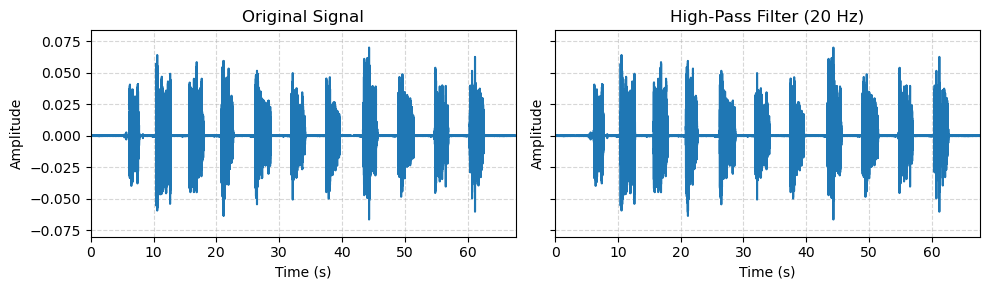

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.plot(times, data)
ax1.set_title("Original Signal")
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax2.plot(times, filtered_h)
ax2.set_title("High-Pass Filter (20 Hz)")
ax2.grid(alpha=.5, ls='--')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

And spectograms ✌

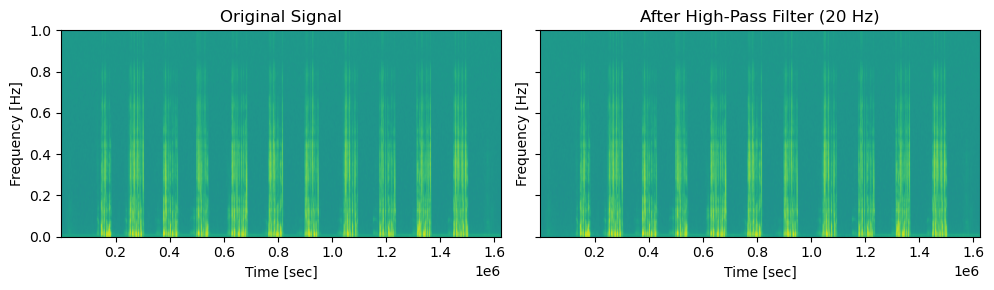

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.specgram(data)
ax1.set_title("Original Signal")
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Frequency [Hz]')
ax2.specgram(filtered_h)
ax2.set_title("After High-Pass Filter (20 Hz)")
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

#### What is a band-pass filter?
A band-pass filter is a type of audio filter that allows a specific range of frequencies (also known as a band) to pass through, while blocking frequencies below and above this range. This can be useful for isolating a particular range of frequencies in an audio signal, or for shaping the tonal character of a sound by boosting or cutting a specific range of frequencies. 
With a band-pass filter, it’s helpful to think of it as a way to select a specific range of sounds by using both the high-pass and low-pass frequencie

In [19]:
def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    '''
    This function designs the filter using the specified 
    lower and upper cutoff frequencies and sample rate, and applies
    it to the input signal to isolate a specific band of frequencies. 
    
    Parameters:
    - data (np.ndarray): The input signal to be filtered
    - edges (list[float]): The lower and upper cutoff frequencies of the bandpass filter in Hz
    - sample_rate (float): The sample rate of the input signal in Hz
    - poles (int): The number of poles in the filter (default is 5)

    Returns:
    - filtered_data (np.ndarray): The filtered signal.
    '''

    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    
    return filtered_data

# Load sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read('Harvard_List_01_1.wav')
times = np.arange(len(data))/sample_rate

# Apply a 10-50 Hz high-pass filter to the original data
filtered_bp = bandpass(data, [10, 50], sample_rate)

C:\Users\Цецо\AppData\Local\Temp\ipykernel_4276\413174148.py:23: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = scipy.io.wavfile.read('Harvard_List_01_1.wav')


Everything is easier when we plot the results, soo...

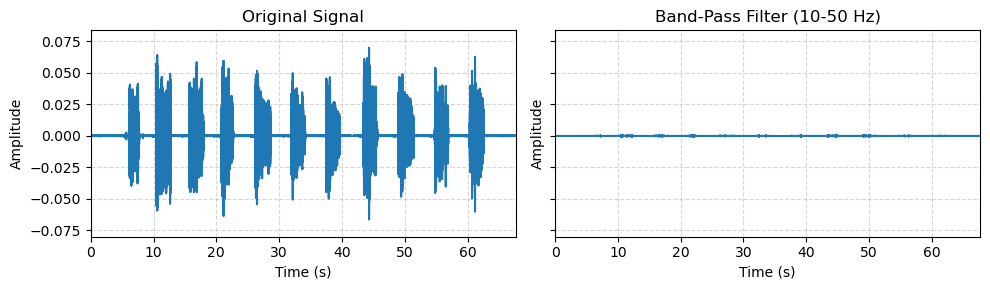

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.plot(times, data)
ax1.set_title("Original Signal")
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax2.plot(times, filtered_bp)
ax2.set_title("Band-Pass Filter (10-50 Hz)")
ax2.grid(alpha=.5, ls='--')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

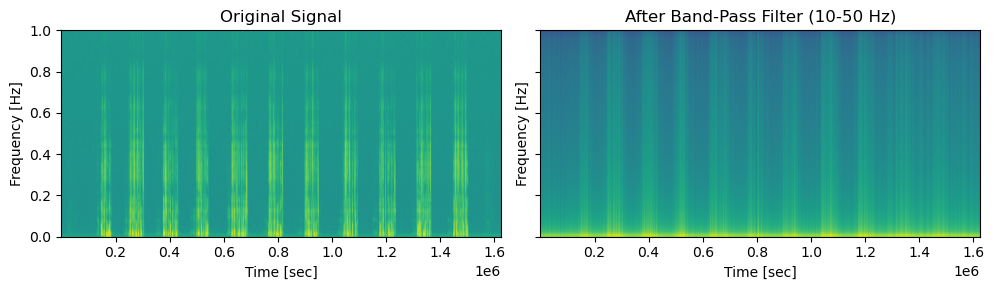

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.specgram(data)
ax1.set_title("Original Signal")
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Frequency [Hz]')
ax2.specgram(filtered_bp)
ax2.set_title("After Band-Pass Filter (10-50 Hz)")
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

#### What is a band-stop filter?
A band-stop filter is a filter that allows us to let everything pass, while selecting a band of frequencies to remove.

In [22]:
def bandstop(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    '''
    This function designs the filter using the 
    specified lower and upper cutoff frequencies and sample rate, 
    and applies it to the input signal to attenuate a specific 
    band of frequencies

    Parameters:
    - data (np.ndarray): The input signal to be filtered
    - edges (list[float]): The lower and upper cutoff frequencies of the band-stop filter in Hz
    - sample_rate (float): The sample rate of the input signal in Hz
    - poles (int): The number of poles in the filter (default is 5)

    Returns:
    - filtered_data (np.ndarray): The filtered signal
    '''
    
    sos = scipy.signal.butter(poles, edges, 'bandstop', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    
    return filtered_data

# Load sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read('Harvard_List_01_1.wav')
times = np.arange(len(data)) / sample_rate

# Apply a 10-50 Hz band-stop filter to the original data
filtered_bs = bandstop(data, [10, 50], sample_rate)

C:\Users\Цецо\AppData\Local\Temp\ipykernel_4276\1663378580.py:24: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = scipy.io.wavfile.read('Harvard_List_01_1.wav')


Let's plot!

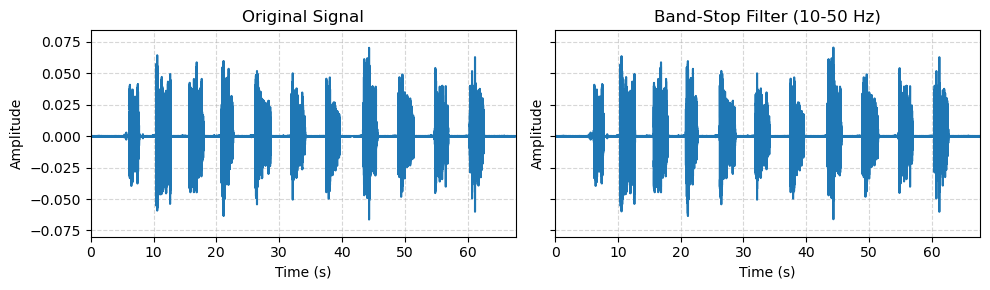

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.plot(times, data)
ax1.set_title("Original Signal")
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax2.plot(times, filtered_bs)
ax2.set_title("Band-Stop Filter (10-50 Hz)")
ax2.grid(alpha=.5, ls='--')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

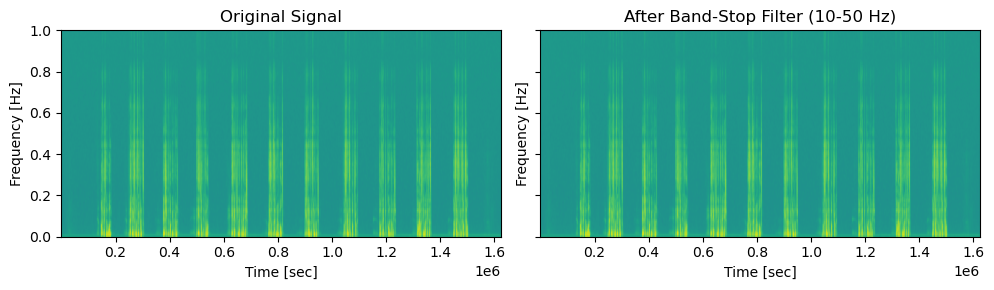

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax1.specgram(data)
ax1.set_title("Original Signal")
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Frequency [Hz]')
ax2.specgram(filtered_bs)
ax2.set_title("After Band-Stop Filter (10-50 Hz)")
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

## 5. Audio effects

Audio effects are techniques used to process and modify an audio signal. They can change the tonal quality of the sound, add different textures and colors, or produce unique effects.

### Reverb
Reverb, an abbreviation for reverberation, occurs when sound waves bounce off surfaces and merge with the original sound, creating a series of diminishing echoes. Picture singing in a large cathedral or yelling across a canyon; after the initial sound, your voice reflects off the surrounding surfaces, producing reverb. This is the prolonged sound you hear after the initial noise as it reflects off different objects before gradually fading.

In [25]:
# IPython.display.Audio("reverb-89603.wav")

#### Mathematical Representation
1. Impulse Response - The impulse response (IR) of a room is a function that characterizes how an acoustic space responds to an impulse. Mathematically, if $h(t)$ is the impulse response and $x(t)$ is the input signal, the output $y(t)$ can be found using convolution:
$$y(t) = (x * h)(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) \, d\tau$$
2. Reverberation Time (RT60) - it is a measure of the time required for the sound to "fade away" in an enclosed area after the source of the sound has stopped. The Sabine formula can be used to estimate RT60 for a room:
$$\text{RT60} = \frac{0.161 \cdot V}{A}$$
where $V$ is the volume of the room in cubic meters and $A$ is the total absorption in the room (sum of the absorption coefficients of all surfaces multiplied by their areas).

### Delay 
Delay is an audio signal processing technique that records an input signal to a storage medium and then plays it back after a period of time. When the delayed playback is mixed with the live audio, it creates an echo-like effect, whereby the original audio is heard followed by the delayed audio. The delayed signal may be played back multiple times, or fed back into the recording, to create the sound of a repeating, decaying echo.

In [26]:
# IPython.display.Audio("14-delay-tronic-transition-fx-178653.wav")

#### Basic Delay
﻿The basic delay plays back an audio signal after a specified delay time. Depending on the application, the delay time might range from a few milliseconds to several seconds or longer. It is common to mix the delayed output with the original input, thereby producing two copies of the sound. For this reason the basic delay is also sometimes known as an echo effect (though as we will see, the perception of echo also depends on the delay time).
We can express the output audio samples $y[n]$ as a function of the input samples $x[n]$, the delay time $N$ (expressed in samples), and the gain $g$ of the delayed signal:
$$y[n] = x[n] + g x[n - N]$$

Delay is a linear, time-invariant effect. To show linearity, consider two signals $x1[n]$ and $x2[n]$. Let $y1[n]$ and $y2[n]$ be the delayed output of each signal individually. If we delay the sum of the signals, we find that the output is the
sum of the individual delayed signals:
$$y[n] = (x_1[n] + x_2[n]) + g(x_1[n - N] + x_2[n - N])$$ 
$$= (x_1[n] + gx_1[n - N]) + (x_2[n] + gx_2[n - N])$$ 
$$= y_1[n] + y_2[n]$$

Time invariance implies that shifting the input in time produces an identical shift in the output. Consider taking the delay of   $x[n] = x[nM]$ for some number of samples $M$:
$$y_d[n] = x[n - M]+ gx[n − M − N] = y[n - M]$$

### Chorus
The chorus effect creates the illusion of multiple instruments or voices playing together by slightly delaying the original signal and modulating the delay time.

In [27]:
# IPython.display.Audio("mixed-chorus-transformation-43104.wav")

#### Mathematical Principles Behind the Chorus Effect
1. Delay Line - a discrete-time system that delays an input signal by a certain number of samples.
If $x(n)$ is the input signal and $y(n)$ is the output signal, a delay of $D$ samples can be represented as:
$$y(n) = x(n - D)$$
2. Modulation - The delay time $D$ is not constant; it is modulated by an LFO (Low-Frequency Oscillator). The delay time $D(t)$ at time $t$ can be expressed as:
$$D(t) = D_0 + D_m \sin(2\pi f_{\text{LFO}} t)$$
where $D_0$ is the base delay time, $D_m$ is the modulation depth, and $f_{\text{LFO}}$ is the frequency of the LFO.
3. Mixing - The modulated delayed signal is mixed with the original signal. If $x(t)$ is the original signal and $y(t)$ is the delayed signal, the output $z(t)$ can be expressed as:
$$z(t) = (1 - \alpha) x(t) + \alpha y(t)$$
where $\alpha$ is the mix factor $(0 \leq \alpha \leq 1)$ that determines the balance between the original and delayed signals.

## 6. What is an Equalizer?
An equalizer is a device or program that adjusts the balance between frequency components of a signal. It is commonly used in audio processing to enhance the sound quality by increasing or decreasing the amplitude of specific frequency bands. Equalizers are crucial in various applications, such as audio engineering, broadcasting, and telecommunications, where they help to improve sound clarity and quality.

###  Types of Equalizers
1. Graphic Equalizers - utilize multiple sliders for different frequency bands, providing a visual representation of the equalizer settings.
2. Parametric Equalizers - provide control over three parameters: frequency, bandwidth (Q factor), and gain and offer greater flexibility and precision compared to graphic equalizers.
3. Shelving Equalizers - boost or attenuate frequencies above or below a certain point.
4. Dynamic Equalizers - adjust frequency response based on the input signal's amplitude.

An equalizer typically consists of multiple filters, each targeting a specific frequency band. By adjusting the gain (amplitude) of these bands, an equalizer can enhance or attenuate specific frequencies, thus altering the tonal quality of the audio.

In [28]:
def butter_lowpass(cutoff: float, fs: float, order: int=5):
    '''
    This function designs a Butterworth low-pass filter.
    
    Parameters:
    - cutoff (float): Desired cutoff frequency of the filter in Hz
    - fs (float): Sampling rate of the signal in Hz
    - order (int): Order of the filter (default is 5)

    Returns:
    - b, a (tuple): Numerator (b) and denominator (a) coefficients of the filter
    '''
    
    nyquist = 0.5 * fs # Nyquist frequency
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    
    return b, a

In [29]:
def butter_highpass(cutoff: float, fs: float, order: int=5):
    '''
    This function designs a Butterworth high-pass filter.

    Parameters:
    - cutoff (float): Desired cutoff frequency of the filter in Hz
    - fs (float): Sampling rate of the signal in Hz
    - order (int): Order of the filter (default is 5)
    
    Returns:
    - b, a (tuple): Numerator (b) and denominator (a) coefficients of the filter
    '''
    
    nyquist = 0.5 * fs # Nyquist frequency
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    
    return b, a

In [30]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    '''
    This function designs a Butterworth band-pass filter.

    Parameters:
    - lowcut (float): Lower cutoff frequency of the filter in Hz
    - highcut (float): Upper cutoff frequency of the filter in Hz
    - fs (float): Sampling rate of the signal in Hz
    - order (int): Order of the filter (default is 5)
    
    Returns:
    - b, a (tuple): Numerator (b) and denominator (a) coefficients of the filter
    '''
    
    nyquist = 0.5 * fs # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    
    return b, a

In [31]:
def apply_filter(data, cutoff, fs, filter_type='low', order=5):
    '''
    This function applies the specified Butterworth filter to the input data.

    Parameters:
    - data (np.ndarray): Input signal to be filtered
    - cutoff (float): Desired cutoff frequency of the filter in Hz
    - fs (float): Sampling rate of the signal in Hz
    - filter_type (str): Type of filter ('low' or 'high')
    - order (int): Order of the filter (default is 5)

    Returns:
    - y (np.ndarray): Filtered signal
    '''
    
    if filter_type == 'low':
        b, a = butter_lowpass(cutoff, fs, order=order)
    elif filter_type == 'high':
        b, a = butter_highpass(cutoff, fs, order=order)
    else:
        raise ValueError("Invalid filter type. Choose 'low' or 'high'.")
        
    y = lfilter(b, a, data)
    
    return y

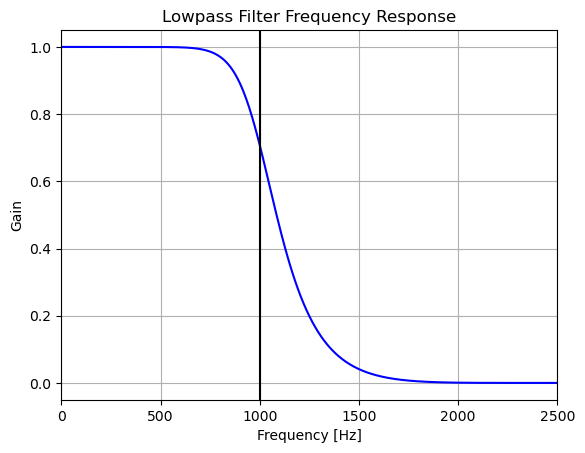

In [32]:
def plot_frequency_response(b, a, fs, cutoff, filter_type):
    '''
    This function plots the frequency response of the designed filter.

    Parameters:
    - b, a (tuple): Numerator (b) and denominator (a) coefficients of the filter.
    - fs (float): Sampling rate of the signal in Hz.
    - cutoff (float): Cutoff frequency of the filter in Hz.
    - filter_type (str): Type of filter ('low' or 'high').
    '''
    
    w, h = freqz(b, a)
    
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
    plt.axvline(cutoff, color='k')
    plt.xlim(0, 0.5 * fs)
    plt.title(f"{filter_type.capitalize()}pass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Gain')
    plt.grid()
    plt.show()

fs = 5000  # Sample rate
cutoff = 1000.0  # Desired cutoff frequency
data = np.sin(2 * np.pi * np.linspace(0, 1, int(fs)))  # Sample data (sine wave)

filtered_data = apply_filter(data, cutoff, fs, filter_type='low')
b, a = butter_lowpass(cutoff, fs)
plot_frequency_response(b, a, fs, cutoff, filter_type='low')

The provided filter functions are fundamental components of an equalizer. By designing low-pass, high-pass, and band-pass filters, and applying them to an audio signal, you can control the signal's frequency content in a manner similar to an equalizer. The ability to selectively enhance or attenuate specific frequency bands allows for sophisticated audio processing and sound shaping, which are the primary goals of an equalizer.

## 7. Conclusion
Throughout this project, I delved into the essentials of audio signals and their processing. I explored key concepts such as sample width, sample rate, and decibels, understanding their critical roles in determining audio quality. I examined how audio signals can be represented in both time and frequency domains, with a focus on how the Fourier transform helps convert a time-domain signal into its frequency-domain representation.

I studied various types of audio filters, including high-pass, low-pass, band-pass, and band-stop filters. These filters are essential for manipulating specific frequency ranges in audio signals, enabling the enhancement or attenuation of certain frequencies to achieve desired audio effects.

In addition to filters, I explored common audio effects such as reverb, chorus, and delay and the math behind them.

I also covered the concept of equalizers, which are specialized filters used to adjust the balance of frequencies within an audio signal. Equalizers are crucial for fine-tuning sound quality in various settings, whether in live sound environments, recording studios, or playback systems.

Overall, this project provided me with a comprehensive understanding of audio filters and equalizers. It highlighted the importance of these tools in enhancing and shaping audio quality, giving me valuable insights into the mathematical and practical aspects of audio signal processing.

## 8. References
Here are some of the sources I read from: 
1. https://cc-techgroup.com/terms/a/audio-signal/
2. https://swharden.com/blog/2020-09-23-signal-filtering-in-python/
3. https://www.izotope.com/en/learn/digital-audio-basics-sample-rate-and-bit-depth.html
4. https://www.scicoding.com/introduction-to-spectrograms
5. https://community.sw.siemens.com/s/article/what-is-the-fourier-transform
6. https://blog.native-instruments.com/audio-filters-guide/#what-is
7. https://ceid.utsa.edu/agrigoryan/wp-content/uploads/sites/23/2019/01/Art_lectures_inMaathSS.pdf
8. https://home.engineering.iastate.edu/~julied/classes/ee524/LectureNotes/l5.pdf
9. https://ia801301.us.archive.org/23/items/GuideToDigitalSignalProcessing/Guide%20To%20Digital%20Signal%20Processing.pdf
10. https://www.researchgate.net/publication/329798117_Mathematical_Equalization_of_Sound_Systems
11. https://en.wikipedia.org/wiki/Equalization_(audio)